In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
energies = np.linspace(-10,10,101)

In [28]:
print(energies)

[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]


In [46]:
dos = np.zeros(len(energies))
print(dos)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [47]:
print(np.where(np.round(energies%1,2)==0.))
# dos[np.where(np.round(energies%1,2)==0.)]
dos[[5,21,45,63,82]] = 5
print(dos)

(array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100], dtype=int64),)
[0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


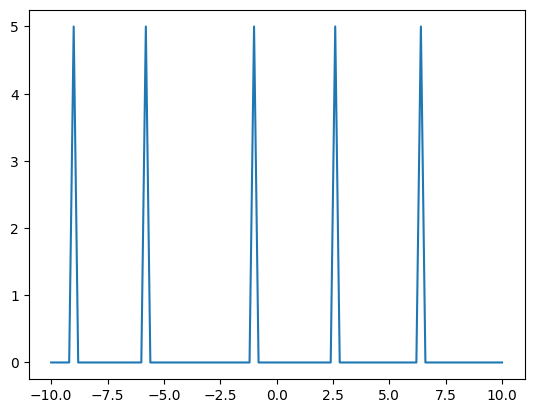

In [48]:
plt.plot(energies, dos)

In [49]:
energies[np.where(dos!=0)[0]]

array([-9. , -5.8, -1. ,  2.6,  6.4])

In [124]:
smeared_dos = np.zeros(len(dos))
for ind in np.where(dos!=0)[0]:
    for i, j in enumerate(dos):
#         print(dos[i])
        smeared_dos[i] = max(smeared_dos[i], dos[ind]*np.exp(-1*(energies[ind]-energies[i])**2/10))

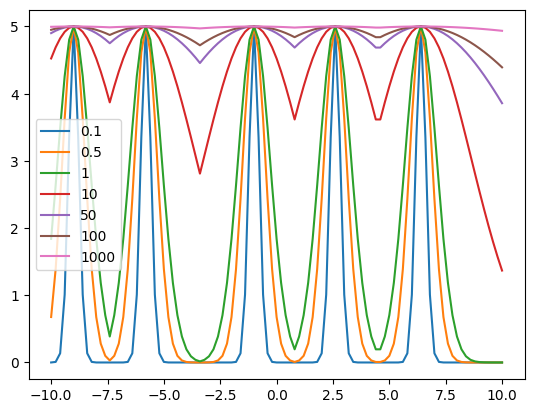

In [127]:
fig = plt.figure()
for sigma in [0.1,0.5,1,10,50,100,1000]:
    smeared_dos = np.zeros(len(dos))
    for ind in np.where(dos!=0)[0]:
        for i, j in enumerate(dos):
    #         print(dos[i])
            smeared_dos[i] = max(smeared_dos[i], dos[ind]*np.exp(-1*(energies[ind]-energies[i])**2/sigma))
    
    plt.plot(energies, smeared_dos, label=f'{sigma}')
plt.legend()

In [58]:
from scipy.stats import norm

In [60]:
smeared_dos = np.zeros(len(dos))
for e in energies[np.where(dos!=0)[0]]:
    for i, j in enumerate(dos):
        smeared_dos[i] =  dos[i]*norm(e,0.02) #max(smeared_dos[i], dos[i]*np.exp(-1*(e-energies[i])**2/10))

TypeError: unsupported operand type(s) for *: 'float' and 'rv_continuous_frozen'

In [73]:
x = np.linspace(-10,10,100)
y = np.exp(-1*(x-2)**2/2)

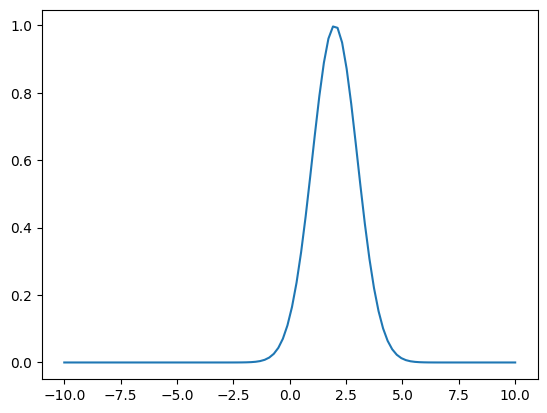

In [74]:
plt.plot(x,y)